In [1]:
# read yolov5 folder
%cd yolov5

D:\computer science\Material\semester6\Pattern Recognation\Project\Phase 2\Dataset\yolov5


In [2]:
%matplotlib inline
import cv2
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.pyplot as plt
import glob
import io
import os
import numpy as np
from xml.dom.minidom import parse
import shutil
from urllib.request import urlopen, Request
from urllib.parse import urlparse
from PIL import Image
from PIL.Image import Image as PilImage
import matplotlib
import torch.distributed as dist
import tensorboard
from tqdm import tqdm
from models.experimental import attempt_load
from IPython.display import Image, clear_output
import pytesseract
import matplotlib.image as mpimg
from cv2 import cv2
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
matplotlib.use('TkAgg')

In [3]:
!echo "train: Dataset\Train\label" > data/alpr.yaml
!echo "val:   Dataset\Train\Val" >> data/alpr.yaml
!echo "nc : 1" >> data/alpr.yaml
!echo "names: ['license']" >> data/alpr.yaml

In [4]:
file = 'data/alpr.yaml'
with open(file) as f:
    print(f.read())

"train: Dataset\Train\label" 
"val:   Dataset\Train\Val" 
"nc : 1" 
"names: ['license']" 



In [5]:
FILE_ROOT = r"D:\computer science\Material\semester6\Pattern Recognation\Project\Phase 2\Dataset"
IMAGE_PATH = FILE_ROOT + "images"
ANNOTATIONS_PATH = FILE_ROOT + "\Annotations"
DATA_ROOT = "D:\computer science\Material\semester6\Pattern Recognation\Project\Phase 2\Dataset"
DEST_IMAGES_PATH = "\images"
DEST_LABELS_PATH = "\Train\label"

In [6]:
os.mkdir("D:\computer science\Material\semester6\Pattern Recognation\Project\Phase 2\Dataset\Train")

In [7]:
 # copy the file
src = r"D:\computer science\Material\semester6\Pattern Recognation\Project\Phase 2\Dataset\images"
dst = r"D:\computer science\Material\semester6\Pattern Recognation\Project\Phase 2\Dataset\Train\label"
shutil.copytree(src,dst)

'D:\\computer science\\Material\\semester6\\Pattern Recognation\\Project\\Phase 2\\Dataset\\Train\\label'

In [8]:
src = r"D:\computer science\Material\semester6\Pattern Recognation\Project\Phase 2\Dataset\images"
dst = r"D:\computer science\Material\semester6\Pattern Recognation\Project\Phase 2\Dataset\Train\Val"
shutil.copytree(src,dst)

'D:\\computer science\\Material\\semester6\\Pattern Recognation\\Project\\Phase 2\\Dataset\\Train\\Val'

# Convert COCO Annotations to YOLOv5 Labels



In [9]:
def cord_converter(size, box):
    """
    convert xml annotation to darknet format coordinates
    :param size： [w,h]
    :param box: anchor box coordinates [upper-left x,uppler-left y,lower-right x, lower-right y]
    :return: converted [x,y,w,h]
    """

    x1 = int(box[0])
    y1 = int(box[1])
    x2 = int(box[2])
    y2 = int(box[3])

    dw = np.float32(1. / int(size[0]))
    dh = np.float32(1. / int(size[1]))

    w = x2 - x1
    h = y2 - y1
    x = x1 + (w / 2)
    y = y1 + (h / 2)

    x = x * dw
    w = w * dw
    y = y * dh
    h = h * dh
    return [x, y, w, h]
#-------------------------------------------------------------------------------------------------------
def save_file(img_jpg_file_name, size, img_box):

    save_file_name = DATA_ROOT + DEST_LABELS_PATH + '/' + img_jpg_file_name + '.txt'
    print(save_file_name)
    file_path = open(save_file_name, "a+")
    for box in img_box:

        cls_num = 0
        new_box = cord_converter(size, box[1:]) # convert box coord into YOLO x,y,w,h

        file_path.write(f"{cls_num} {new_box[0]} {new_box[1]} {new_box[2]} {new_box[3]}\n")

    file_path.flush()
    file_path.close()
#-------------------------------------------------------------------------------------------------------
def get_xml_data(file_path, img_xml_file):
    img_path = file_path + '/' + img_xml_file + '.xml'
    print(img_path)

    dom = parse(img_path)
    root = dom.documentElement
    img_name = root.getElementsByTagName("filename")[0].childNodes[0].data
    img_size = root.getElementsByTagName("size")[0]
    objects = root.getElementsByTagName("object")
    img_w = img_size.getElementsByTagName("width")[0].childNodes[0].data
    img_h = img_size.getElementsByTagName("height")[0].childNodes[0].data
    img_c = img_size.getElementsByTagName("depth")[0].childNodes[0].data

    img_box = []
    for box in objects:
        cls_name = box.getElementsByTagName("name")[0].childNodes[0].data
        x1 = int(box.getElementsByTagName("xmin")[0].childNodes[0].data)
        y1 = int(box.getElementsByTagName("ymin")[0].childNodes[0].data)
        x2 = int(box.getElementsByTagName("xmax")[0].childNodes[0].data)
        y2 = int(box.getElementsByTagName("ymax")[0].childNodes[0].data)
        print("box:(c,xmin,ymin,xmax,ymax)", cls_name, x1, y1, x2, y2)
        img_jpg_file_name = img_xml_file + '.jpg'
        img_box.append([cls_name, x1, y1, x2, y2])
    save_file(img_xml_file, [img_w, img_h], img_box)

In [10]:
files = os.listdir(ANNOTATIONS_PATH)
for file in files:
    print("file name: ", file)
    file_xml = file.split(".")
    get_xml_data(ANNOTATIONS_PATH, file_xml[0])

file name:  Cars0.xml
D:\computer science\Material\semester6\Pattern Recognation\Project\Phase 2\Dataset\Annotations/Cars0.xml
box:(c,xmin,ymin,xmax,ymax) licence 226 125 419 173
D:\computer science\Material\semester6\Pattern Recognation\Project\Phase 2\Dataset\Train\label/Cars0.txt
file name:  Cars1.xml
D:\computer science\Material\semester6\Pattern Recognation\Project\Phase 2\Dataset\Annotations/Cars1.xml
box:(c,xmin,ymin,xmax,ymax) licence 134 128 262 160
D:\computer science\Material\semester6\Pattern Recognation\Project\Phase 2\Dataset\Train\label/Cars1.txt
file name:  Cars10.xml
D:\computer science\Material\semester6\Pattern Recognation\Project\Phase 2\Dataset\Annotations/Cars10.xml
box:(c,xmin,ymin,xmax,ymax) licence 140 5 303 148
D:\computer science\Material\semester6\Pattern Recognation\Project\Phase 2\Dataset\Train\label/Cars10.txt
file name:  Cars100.xml
D:\computer science\Material\semester6\Pattern Recognation\Project\Phase 2\Dataset\Annotations/Cars100.xml
box:(c,xmin,ymin

In [11]:
#copy files .txt in validate folder
os.mkdir("D:\computer science\Material\semester6\Pattern Recognation\Project\Phase 2\Dataset\Train\Val\labels")
src = r"D:\computer science\Material\semester6\Pattern Recognation\Project\Phase 2\Dataset\Train\label"
dst = r"D:\computer science\Material\semester6\Pattern Recognation\Project\Phase 2\Dataset\Train\Val\labels"
files = glob.iglob(os.path.join(src, "*.txt"))
for file in files:
    if os.path.isfile(file):
        shutil.copy2(file, dst)

# YOLOv5 Training

In [15]:
%%time
from roboflow import Roboflow
rf = Roboflow(api_key="mumT2cwVQbk2YjzSvMt2")
project = rf.workspace("car-license-plate-detection-ubirg").project("car-license-plate-detection-jtinl")
dataset = project.version(1).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Car-License-Plate-Detection-1 in yolov5pytorch:: 100%|██████████| 612/612 [00:01<00:00, 427.45it/s]

CPU times: total: 2.08 s
Wall time: 7.62 s


In [16]:
%%time
!python train.py --img 416 --batch 16 --epochs 150 --data data/data.yaml --cfg models/yolov5s.yaml

train: weights=yolov5s.pt, cfg=models/yolov5s.yaml, data=data/data.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=150, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
YOLOv5  2022-4-28 torch 1.11.0+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, perspective=0.0, flipud=0.0, fliplr=0.5, mosaic=

github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5
github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5
CPU times: total: 25.5 s
Wall time: 7h 36min 51s


train: weights=yolov5s.pt, cfg=models/yolov5s.yaml, data=data/data.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=150, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
YOLOv5  2022-4-28 torch 1.11.0+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, perspective=0.0, flipud=0.0, fliplr=0.5, mosaic=

# YOLOv5 Detect



In [17]:
%%time
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source Car-License-Plate-Detection-1/test/images --save-txt

CPU times: total: 0 ns
Wall time: 10.8 s


detect: weights=['runs/train/exp/weights/best.pt'], source=Car-License-Plate-Detection-1/test/images, data=data\coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5  2022-4-28 torch 1.11.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7012822 parameters, 0 gradients
image 1/30 D:\computer science\Material\semester6\Pattern Recognation\Project\Phase 2\Dataset\yolov5\Car-License-Plate-Detection-1\test\images\Cars106_png.rf.b46117d559aba3da9689675bb3440224.jpg: 416x416 3 licences, Done. (0.158s)
image 2/30 D:\computer science\Material\semester6\Pattern Recognation\Project\Phase 2\Dataset\yolov5\Car-License-Plate-Detection-1\test\images\Cars114_png.rf.c910a82766e

In [18]:
%%time
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source Car-License-Plate-Detection-1/train/images --save-txt

CPU times: total: 46.9 ms
Wall time: 40.9 s


detect: weights=['runs/train/exp/weights/best.pt'], source=Car-License-Plate-Detection-1/train/images, data=data\coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5  2022-4-28 torch 1.11.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7012822 parameters, 0 gradients
image 1/204 D:\computer science\Material\semester6\Pattern Recognation\Project\Phase 2\Dataset\yolov5\Car-License-Plate-Detection-1\train\images\Cars100_png.rf.0a15e2d88dbafb6f90862c26db300596.jpg: 416x416 1 licence, Done. (0.214s)
image 2/204 D:\computer science\Material\semester6\Pattern Recognation\Project\Phase 2\Dataset\yolov5\Car-License-Plate-Detection-1\train\images\Cars101_png.rf.9fbcb57

In [19]:
%%time
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source Car-License-Plate-Detection-1/valid/images --save-txt

CPU times: total: 0 ns
Wall time: 16.2 s


detect: weights=['runs/train/exp/weights/best.pt'], source=Car-License-Plate-Detection-1/valid/images, data=data\coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5  2022-4-28 torch 1.11.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7012822 parameters, 0 gradients
image 1/66 D:\computer science\Material\semester6\Pattern Recognation\Project\Phase 2\Dataset\yolov5\Car-License-Plate-Detection-1\valid\images\Cars0_png.rf.68a0b221c3e62b30588437d8e425852c.jpg: 416x416 1 licence, Done. (0.173s)
image 2/66 D:\computer science\Material\semester6\Pattern Recognation\Project\Phase 2\Dataset\yolov5\Car-License-Plate-Detection-1\valid\images\Cars104_png.rf.9036f786753

# Display Detected Images

## test detected images


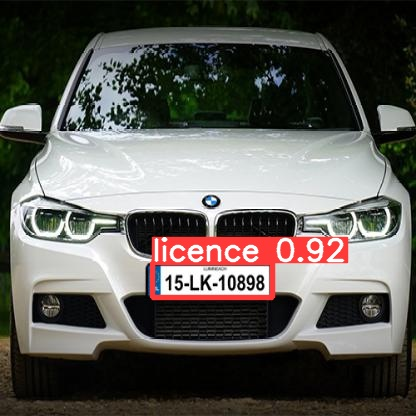

In [9]:
Image('runs/detect/exp/Cars167_png.rf.e258ac473ae64a8f4162724da6881e2f.jpg')

## Train detected images

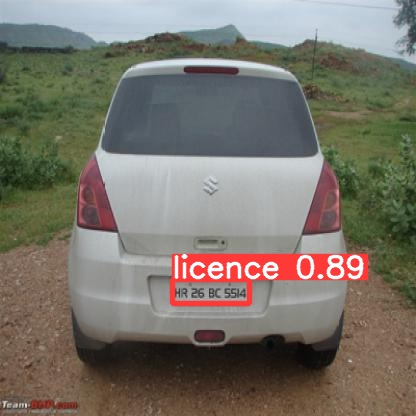

In [10]:
Image('runs/detect/exp2/Cars101_png.rf.9fbcb57f1fddc542ec41a39b54da98ff.jpg')


## validate detected images

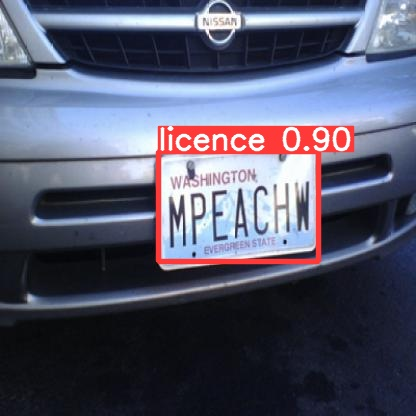

In [11]:
Image('runs/detect/exp3/Cars113_png.rf.81143e9e6d3c06abfa8c8f9a47af6387.jpg')